<a href="https://colab.research.google.com/github/DimosthenisDimoulias/datastories_for_emme/blob/main/teliki%20ergasia/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!python -m spacy download el_core_news_sm

In [2]:
#κάνουμε mount το google drive για να μπορούμε να φέρνουμε αρχεία από εκεί
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#εισάγουμε βιβλιοθήκες που ίσως χρειαστούμε αργότερα
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [4]:
# φτιάχνουμε και το nlp για να το έχουμε έτοιμο για τα wordclouds μου και όποια ανάλυση κειμένου ακολουθήσει
nlp = spacy.load('el_core_news_sm')

In [5]:
#εισάγουμε τα δεδομένα του innews σε ένα dataframe
df=pd.read_excel("/content/gdrive/MyDrive/Copy of report-2.xlsx")

In [6]:
# διαγραφή των rows με τιμή nan σε οποιοδήποτε column
df.dropna(inplace=True)
# reset_index για να ξαναγίνει συνεχής η αρίθμηση του index του dataframe
df = df.reset_index(drop=True)
df.shape

(2809, 9)

In [7]:
#δημιουργούμε μια νέα στήλη ενώνοντας τη στηλη title και τη στηλη text
df['full_text'] = df[['title', 'text']].agg('. '.join, axis=1).astype(str)
df.loc[0, 'full_text']

'Συνεχίζονται οι σκληρές μάχες στη βόρεια Γάζα - Ο ισραηλινός λαός ζητά την επιστροφή των ομήρων. NEWSROOM IEFIMERIDA.GR\n30/06/2024\xa0 07:52\nΣκληρές μάχες μαίνονταν χθες Σάββατο ανάμεσα στις ισραηλινές ένοπλες δυνάμεις και μέλη της Χαμάς στο βόρειο τμήμα της Λωρίδας της\nΓάζας\n, όπου εκτοπίστηκαν, για ακόμη μια φορά, δεκάδες χιλιάδες Παλαιστίνιοι.\nΟ πόλεμος, με έναυσμα άνευ προηγουμένου έφοδο του παλαιστινιακού ισλαμιστικού κινήματος σε νότιους τομείς της ισραηλινής επικράτειας την 7η Οκτωβρίου, συνεχίζεται με αμείωτη ένταση σ’ όλο τον παλαιστινιακό θύλακο, με φόντο την ανησυχία πως θα εξαπλωθεί στον Λίβανο.\nΙσραηλινά στρατεύματα εξαπέλυσαν την 7η Μαΐου χερσαία επίθεση στη Ράφα, την οποία παρουσίαζαν τότε ως το έσχατο μεγάλο οχυρό της Χαμάς. Όμως οι μάχες αναζωπυρώθηκαν έκτοτε σε πολλούς άλλους τομείς, ειδικά στον βορρά.\nΑπό την Πέμπτη\n, διεξάγονται επιχειρήσεις\nστη Σουτζάια, ανατολική συνοικία της πόλης της Γάζας, όπου ο ισραηλινός στρατός ανέφερε πως στοιχεία του εξάλειψαν «

In [8]:
#Προκειμένου να κάνουμε lemmatization κι επειδή το colab από τα error που μου
#βγάζει έχει περιορισμένη μνήμη και δεν μπορεί να διαχειριστεί τόσο μεγάλο όγκο χαρακτήρων για να
#κάνει lemmatization, σπάω το full_text σε δέκα κομμάτια και τα ενώνω αργότερα

#1
text1 = df['full_text'][0:280].str.cat(sep = ' ')
doc1 = nlp(text1)
ctext1 = ' '.join(token.lemma_ for token in doc1)
#2
text2 = df['full_text'][280:561].str.cat(sep = ' ')
doc2 = nlp(text2)
ctext2 = ' '.join(token.lemma_ for token in doc2)
#3
text3 = df['full_text'][561:842].str.cat(sep = ' ')
doc3 = nlp(text3)
ctext3 = ' '.join(token.lemma_ for token in doc3)
#4
text4 = df['full_text'][842:1123].str.cat(sep = ' ')
doc4 = nlp(text4)
ctext4 = ' '.join(token.lemma_ for token in doc4)
#5
text5 = df['full_text'][1123:1404].str.cat(sep = ' ')
doc5 = nlp(text5)
ctext5 = ' '.join(token.lemma_ for token in doc5)
#6
text6 = df['full_text'][1404:1685].str.cat(sep = ' ')
doc6 = nlp(text6)
ctext6 = ' '.join(token.lemma_ for token in doc6)
#7
text7 = df['full_text'][1685:1966].str.cat(sep = ' ')
doc7 = nlp(text7)
ctext7 = ' '.join(token.lemma_ for token in doc7)
#8
text8 = df['full_text'][1966:2247].str.cat(sep = ' ')
doc8 = nlp(text8)
ctext8 = ' '.join(token.lemma_ for token in doc8)
#9
text9 = df['full_text'][2247:2528].str.cat(sep = ' ')
doc9 = nlp(text9)
ctext9 = ' '.join(token.lemma_ for token in doc9)
#10
text10 = df['full_text'][2528:2819].str.cat(sep = ' ')
doc10 = nlp(text10)
ctext10 = ' '.join(token.lemma_ for token in doc10)

In [9]:
#ενώνουμε όλα τα lemmatized text σε ένα
ctexts=[ctext1, ctext2, ctext3, ctext4, ctext5, ctext6,ctext7, ctext8, ctext9, ctext10]
clear_text = ' '.join(ctexts)

In [10]:
#για να βρούμε τους βασικούς δρώντες της υπόθεσης αναζητούμε από τους τίτλους τον
#αριθμό αναφορών σε συγκερκιμένα ονόματα
full_title = df['title'].str.cat(sep = ' ')
doc = nlp(full_title)
cfull_title = ' '.join(token.lemma_ for token in doc)

In [11]:
#αφού κάναμε lemmatize το συνολικό κείμενο με τους ενωμένους τίτλους αναζητούμε τον αριθμό αναφορών
#για συγκεκριμένα άτομα ή ομάδες.
title_list=cfull_title.split(" ")
title_list.count('Νετανιάχου')

207

In [12]:
 title_list.count('Χαμάς')

568

In [13]:
title_list.count('IDF')

17

In [14]:
title_list.count('Χεζμπολάχ')

97

In [15]:
title_list.count('Μοσάντ')

10

In [16]:
title_list.count('Χούθι')

61

In [66]:
#περνάμε τα αποτελέσματα που βρήκαμε σε ένα καινούριο df για να μπρούμε να συγκρίνουμε τον
#αριθμό εμφανίσεων των δρώντων υποκειμένων.
data1 = {
    'Name': ['Νετανιάχου','Χαμάς','IDF','Χεζμπολάχ','Μοσάντ','Χούθι'],
    'Αριθμός εμφανίσεων': [207,568,17,97,10,61]

}
df_subjects= pd.DataFrame(data1)
df_subjects

,Name,Αριθμός εμφανίσεων
0,Νετανιάχου,207
1,Χαμάς,568
2,IDF,17
3,Χεζμπολάχ,97
4,Μοσάντ,10
5,Χούθι,61


<Axes: title={'center': 'Κύριοι δρώντες'}, xlabel='Πρόσωπα ή ομάδες', ylabel='Αριθμός αναφορών σε τίτλους'>

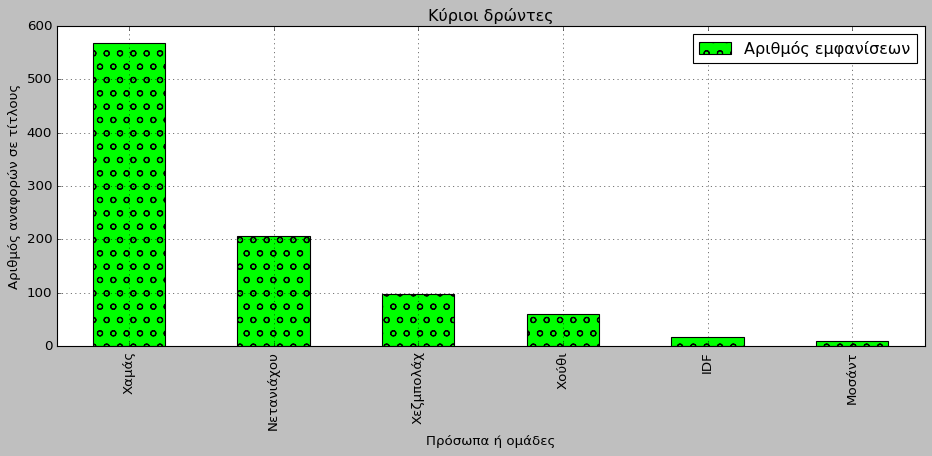

In [67]:
#Βλέπουμε τους κύριους δρώντες
plt.style.use('classic')
df_subjects.set_index('Name', inplace=True)
df_subjects.sort_values(by='Αριθμός εμφανίσεων', ascending=False).plot(kind='bar',title='Κύριοι δρώντες', xlabel="Πρόσωπα ή ομάδες",ylabel="Αριθμός αναφορών σε τίτλους",hatch='o',grid=True,figsize=(14,5),color='lime')

In [19]:
#Το ίδιο που κάναμε για τους δρώντες μπορούμε να κάνουμε και για κάποιες χώρες/τοποθεσίες ώστε να δούμε
#κατά πόσο αυτες εμππλέκονται ανάλογα με τις αναφορές που γίνονται σε αυτές.
full_list=clear_text.split(" ")
full_list.count('Ισραήλ')

13044

In [20]:
full_list.count('Παλαιστίνη')

368

In [21]:
full_list.count('Ιράν')

1938

In [22]:
full_list.count('Ιορδανία')

385

In [23]:
full_list.count('Λίβανος')

107

In [24]:
full_list.count('Συρία')

668

In [25]:
full_list.count('Υεμένη')

572

In [26]:
full_list.count('Αίγυπτος')

751

In [27]:
full_list.count('Ιράκ')

462

In [28]:
#Με τον ίδιο τρόπο φτιάχνουμε ένα dataframe που θα το εισάγουμε στο datawrapper για να φτιάξουμε έναν χάρτη
data2 = {
    'Name': ['Ισραήλ','Παλαιστίνη','Ιράν','Ιορδανία','Λίβανος','Συρία','Υεμένη','Αίγυπτος','Ιράκ'],
    'Αριθμός εμφανίσεων': [13044,368,1938,385,107,668,572,751,462]

}
df_places= pd.DataFrame(data2)
df_places.to_excel('df_places.xlsx')
df_places.sort_values(by='Αριθμός εμφανίσεων', ascending=False)

,Name,Αριθμός εμφανίσεων
0,Ισραήλ,13044
2,Ιράν,1938
7,Αίγυπτος,751
5,Συρία,668
6,Υεμένη,572
8,Ιράκ,462
3,Ιορδανία,385
1,Παλαιστίνη,368
4,Λίβανος,107


In [29]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

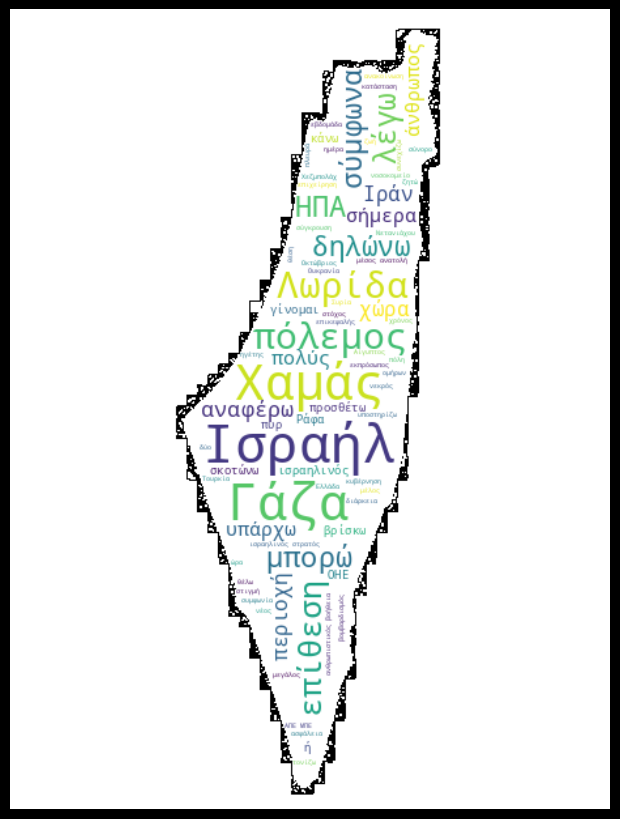

In [30]:
#αφού κάναμε τις απαραίτητες εισαγωγές πάμε να δούμε ποιές είναι οι πιο συχνές λέξεις που χρησιμοποιούνται.
nlp.Defaults.stop_words |= {'IEFIMERIDA','GR','NEWSROOM'}
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    mask = np.array(Image.open('/content/gdrive/MyDrive/istockphoto-1213005846-612x612.jpg')),
    width=1000,
    height=500,
    background_color = 'white',
    contour_color='black',
    contour_width=1
 ).generate(clear_text)
fig = plt.figure(
    figsize=(10, 8),
    facecolor='k',
    edgecolor='k',
)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [31]:
#Προχωράμε σε sentiment analysis
emolex_df = pd.read_csv('https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv')

In [32]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [33]:
#ενώνουμε την ημερομηνία με την ώρα για να μπορούμε να περάσουμε τα δεδομένα σε μορφή datetime
df['date'] = df[['date','time']].agg(' '.join, axis=1)

In [34]:
short_df = df[['date','full_text' ]]

In [42]:
#προσθέτουμε τη νέα στήλη datetime
short_df['datetime'] = pd.to_datetime(short_df['date'], format='%Y-%m-%d %H:%M:%S')

In [43]:
#προσθέτουμε σε νέες στήλες τα στοιχεία από το datetime
short_df['year'] = pd.DatetimeIndex(df['datetime']).year
short_df['month'] = pd.DatetimeIndex(df['datetime']).month
short_df['day'] = pd.DatetimeIndex(df['datetime']).day
short_df['hour'] = pd.DatetimeIndex(df['datetime']).hour
short_df['minute'] = pd.DatetimeIndex(df['datetime']).minute
short_df['second'] = pd.DatetimeIndex(df['datetime']).second

In [44]:
#Kάνουμε vectorization
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [45]:
matrix = vec.fit_transform(df['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Δημιουργώ λίστες με τα ανάλογα συναισθήματα
positive_words = emolex_df[emolex_df.Positive == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
angry_words = emolex_df[emolex_df.Anger == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [47]:
#προσθέτω τα δεδομένα στο dataframe
short_df['anger'] = wordcount_df[angry_words].sum(axis=1)
short_df['positive'] = wordcount_df[positive_words].sum(axis=1)
short_df['joy'] = wordcount_df[joy_words].sum(axis=1)
short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
short_df['trust'] = wordcount_df[trust_words].sum(axis=1)
short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
short_df['negative'] = wordcount_df[negative_words].sum(axis=1)
short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [48]:
#ορίζουμε το datetime ως index για να μπορούμε να κάνουμε οπτικοποίηση με το .resample()
short_df.reset_index(inplace=True)
short_df.set_index('datetime', inplace=True)
short_df.head()

,level_0,index,date,full_text,year,month,day,hour,minute,second,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
datetime,,,,,,,,,,,,,,,,,,,,
2024-06-30 08:17:05,0,0,2024-06-30 08:17:05,Συνεχίζονται οι σκληρές μάχες στη βόρεια Γάζα ...,2024,6,30,8,17,5,20,27,10,6,8,25,12,13,33,19
2024-06-29 21:38:48,1,1,2024-06-29 21:38:48,Γάζα: Καμία πρόοδος στις συνομιλίες κατάπαυσης...,2024,6,29,21,38,48,4,11,4,4,2,7,6,3,6,4
2024-06-28 23:22:16,2,2,2024-06-28 23:22:16,Γάζα: Η αμερικανική προβλήτα για την παράδοση ...,2024,6,28,23,22,16,2,14,1,7,2,12,4,8,10,9
2024-06-28 22:32:46,3,3,2024-06-28 22:32:46,Υεμένη: Πέντε πύραυλοι κατέπεσαν κοντά σε πλοί...,2024,6,28,22,32,46,0,2,0,2,0,0,3,1,4,0
2024-06-28 14:51:35,4,4,2024-06-28 14:51:35,Γάζα: Με αμείωτη ένταση συνεχίζονται οι επιχει...,2024,6,28,14,51,35,15,8,2,7,9,1,9,10,20,12


<Axes: title={'center': 'Αριθμός άρθρων ανά Μήνα'}, xlabel='Μήνας', ylabel='Αριθμός άρθρων'>

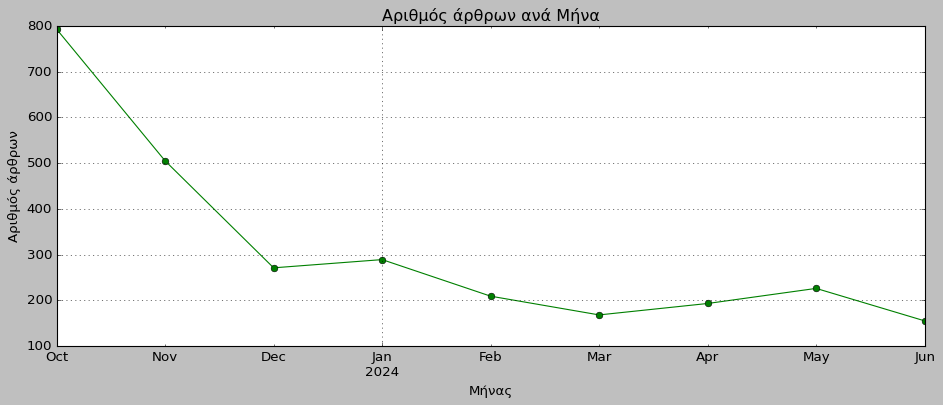

In [68]:
short_df['full_text'].resample('M').count().plot(kind='line',title='Αριθμός άρθρων ανά Μήνα', xlabel="Μήνας",ylabel="Αριθμός άρθρων",style='-o',grid=True,color='g',figsize=(14,5))

<Axes: title={'center': 'Μέσος όρος λέξεων ανά Μήνα δημοσιγραφικής κάλυψης'}, xlabel='Μήνας', ylabel='Μέσος όρος λέξεων'>

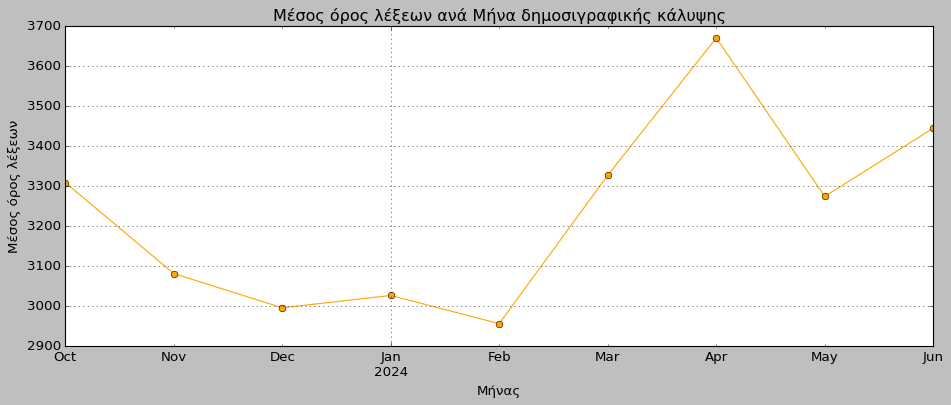

In [69]:
short_df['full_text'].str.len().resample('M').mean().plot(title='Μέσος όρος λέξεων ανά Μήνα δημοσιγραφικής κάλυψης', xlabel="Μήνας",ylabel="Μέσος όρος λέξεων",style='-o',grid=True,color='orange',figsize=(14,5))

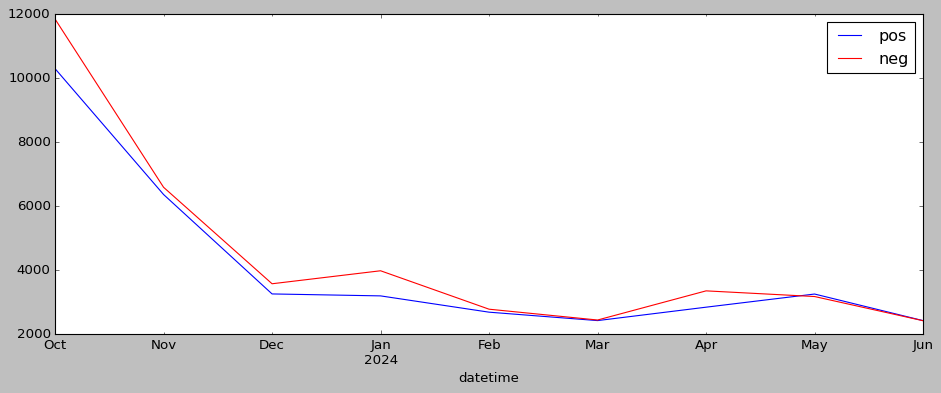

In [78]:
ax = short_df['positive'].resample('M').sum().plot(figsize=(14,5), color = 'b',label = 'pos')
short_df['negative'].resample('M').sum().plot(figsize=(14,5), ax = ax, color = 'r',label = 'neg').legend()

<Axes: xlabel='datetime'>

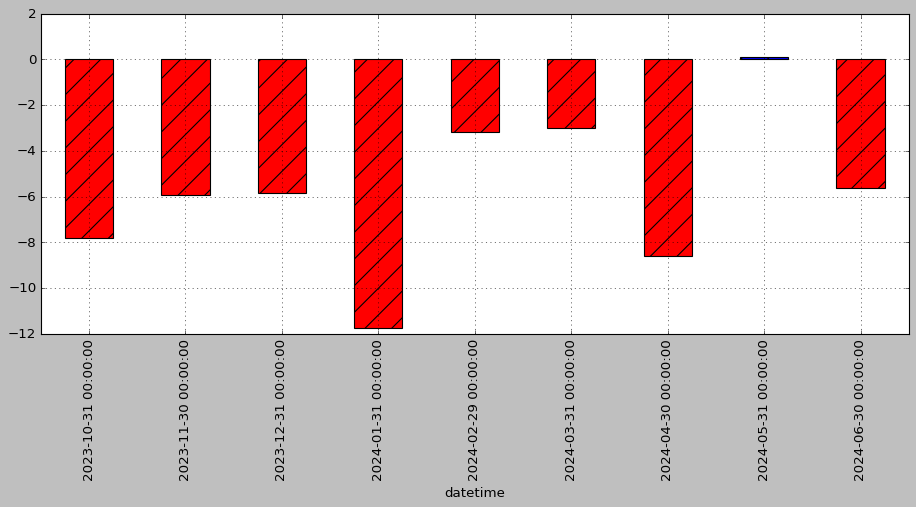

In [79]:
short_df['(-)αρνητικότητα | θετικότητα(+)'] = short_df.positive*100//short_df[['positive','negative']].sum(
        axis=1) - short_df.negative*100//short_df[['positive','negative']].sum(axis=1)

short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean().plot(kind='bar',edgecolor='black', hatch='/', grid=True,
                                                                               color=(short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean()>0
                                                                               ).map({True: 'b', False: 'r'}), figsize=(14,5))

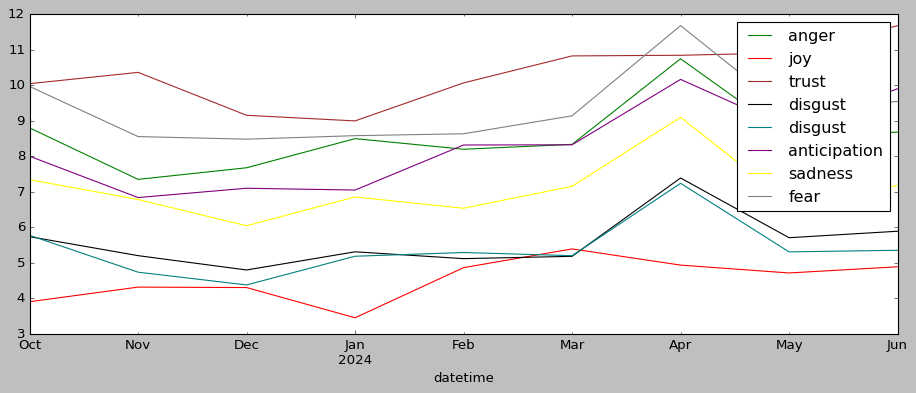

In [73]:
ax = short_df['anger'].resample('M').mean().plot(figsize=(14,5),
                                                          color = 'green', label='anger')
short_df['joy'].resample('M').mean().plot(figsize=(14,5), ax = ax,
                                                   label = 'joy', color = 'red')
short_df['trust'].resample('M').mean().plot(figsize=(14,5), ax = ax,
                                                label = 'trust',color = 'brown').legend()
short_df['disgust'].resample('M').mean().plot(figsize=(14,5), ax = ax,
                                                label = 'disgust',color = 'black').legend()
short_df['surprise'].resample('M').mean().plot(figsize=(14,5), ax = ax,
                                                label = 'disgust',color = 'teal').legend()
short_df['anticipation'].resample('M').mean().plot(figsize=(14,5), ax = ax,
                                                label = 'anticipation',color = 'purple').legend()
short_df['sadness'].resample('M').mean().plot(figsize=(14,5), ax = ax,
                                                label = 'sadness',color = 'yellow').legend()
short_df['fear'].resample('M').mean().plot(figsize=(14,5), ax = ax,
                                                label = 'fear',color = 'grey').legend()